In [1424]:
import os
os.chdir(os.getcwd())
os.getcwd()

'/Users/pantchanit/Documents/Pant_Stat_Asign1'

In [1425]:
import pandas as pd
import numpy as np
import matplotlib as mpe
import seaborn as sns
%matplotlib inline

In [1426]:
country = pd.read_excel('countries_regions.xlsx')
country.head()

,Country Name,Region,ThirdWorld
0,Afghanistan,South Asia,1
1,Albania,Eastern Europe,0
2,Algeria,Africa,0
3,American Samoa,Australia and Oceanea,0
4,Andorra,Western Europe,0


# GET DATA Broadband

In [1427]:
broadband1 = pd.read_excel('infrastructure/broadband.xlsx')
broadband1.replace({'..':np.nan},inplace=True)
broadband1.head()


,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.004814,0.004648,0.004495,0.020535,0.024874,0.025297,0.043041,0.051741,0.068254
1,Albania,ALB,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,4.377872,5.493573,6.286818,7.180321,8.402315,9.228641,10.526845,12.555659,15.140735,17.684951
2,Algeria,DZA,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,2.675159,3.088892,3.356045,4.109816,5.712209,7.051711,7.756294,7.262935,8.321684,8.643942
3,American Samoa,ASM,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Fixed broadband subscriptions (per 100 people),IT.NET.BBND.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,30.762893,32.641004,34.335306,36.319796,39.345733,42.032679,44.524097,46.311976,47.131264,NaN


In [1428]:
broadband1 = country.join(broadband1[['2005 [YR2005]', '2014 [YR2014]']])
broadband1.head()


,Country Name,Region,ThirdWorld,2005 [YR2005],2014 [YR2014]
0,Afghanistan,South Asia,1,0.000858,0.004495
1,Albania,Eastern Europe,0,0.008812,7.180321
2,Algeria,Africa,0,0.407243,4.109816
3,American Samoa,Australia and Oceanea,0,NaN,NaN
4,Andorra,Western Europe,0,13.111948,36.319796


<AxesSubplot:>

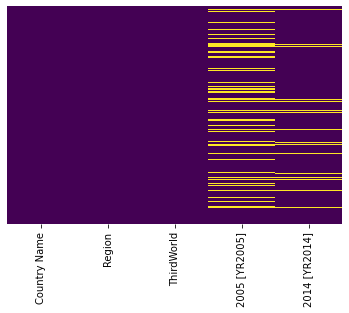

In [1429]:
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1430]:
broadband1 = broadband1.dropna()
broadband1.head()

,Country Name,Region,ThirdWorld,2005 [YR2005],2014 [YR2014]
0,Afghanistan,South Asia,1,0.000858,0.004495
1,Albania,Eastern Europe,0,0.008812,7.180321
2,Algeria,Africa,0,0.407243,4.109816
4,Andorra,Western Europe,0,13.111948,36.319796
6,Antigua and Barbuda,North America,0,7.120849,11.618159


<AxesSubplot:>

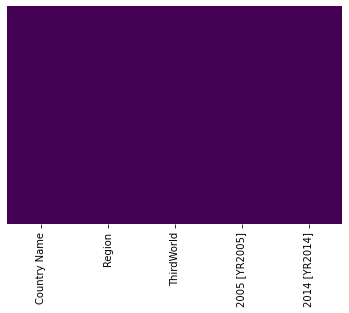

In [1431]:
sns.heatmap(broadband1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1432]:
# Removing the outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [1433]:
#North America 2005 with outliers

In [1434]:
broadband1.groupby("Region")["2005 [YR2005]"].describe()


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Africa,34.0,0.123825,0.241996,0.000080,0.002913,0.006832,0.149426,1.069398
Australia and Oceanea,13.0,2.316387,3.274209,0.028192,0.095761,0.639215,4.060192,9.990812
East Asia,6.0,14.110750,10.664358,0.071247,5.627231,16.123377,22.920551,25.031709
Eastern Europe,16.0,1.537395,1.667844,0.008812,0.342232,1.174760,2.230281,6.461363
Middle East,13.0,2.762350,5.028832,0.000000,0.208582,1.101226,2.818519,18.831916
North America,24.0,6.121140,7.492492,0.193686,0.994344,3.167444,8.230552,27.901958
Northern Europe,12.0,16.233427,8.288783,2.698499,11.169050,14.818864,22.942459,27.902480
South America,12.0,1.186686,1.252894,0.096152,0.214663,1.006329,1.530272,4.378522
South Asia,5.0,0.250974,0.433268,0.000858,0.009108,0.107444,0.117462,1.019999


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

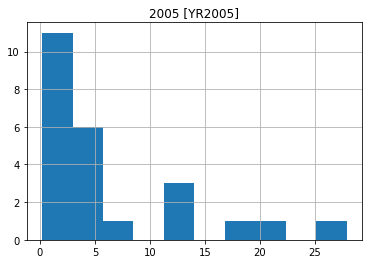

In [1435]:
broadband1[broadband1.Region=="North America"].hist(column='2005 [YR2005]')

In [1436]:
#North America 2005 without outliers

In [1437]:
NA_broadband_without_2005 = broadband1[broadband1.Region=="North America"]
NA_broadband_without_2005 = NA_broadband_without_2005[["Country Name","Region","2005 [YR2005]"]]
NA_broadband_without_2005

,Country Name,Region,2005 [YR2005]
6,Antigua and Barbuda,North America,7.120849
9,Aruba,North America,12.270196
13,"Bahamas, The",North America,4.119326
16,Barbados,North America,11.559660
19,Belize,North America,1.769556
21,Bermuda,North America,27.901958
35,Canada,North America,21.775689
46,Costa Rica,North America,1.048045
55,Dominica,North America,4.816614
56,Dominican Republic,North America,0.666948


In [1438]:
upper, lower = outliers(NA_broadband_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_broadband_without_2005 = NA_broadband_without_2005[(NA_broadband_without_2005["2005 [YR2005]"] > lower) & (NA_broadband_without_2005["2005 [YR2005]"] < upper)]
NA_broadband_without_2005

Upper whisker:  19.0848636895
Lower Whisker:  -9.8599670925


,Country Name,Region,2005 [YR2005]
6,Antigua and Barbuda,North America,7.120849
9,Aruba,North America,12.270196
13,"Bahamas, The",North America,4.119326
16,Barbados,North America,11.559660
19,Belize,North America,1.769556
46,Costa Rica,North America,1.048045
55,Dominica,North America,4.816614
56,Dominican Republic,North America,0.666948
59,El Salvador,North America,0.699160
78,Grenada,North America,3.078511


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

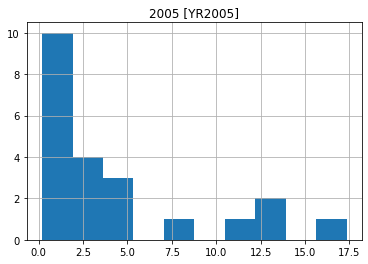

In [1439]:
NA_broadband_without_2005.hist()

In [1440]:
NA_broadband_without_2005.describe()

,2005 [YR2005]
count,22.000000
mean,4.419532
std,4.918342
min,0.193686
25%,0.886943
50%,2.915491
75%,4.683341
max,17.341517


In [1441]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

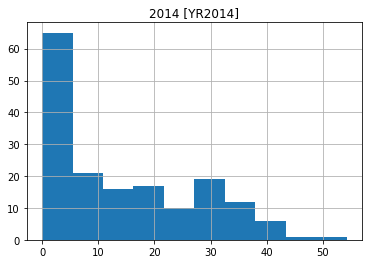

In [1442]:
broadband1.hist(column='2014 [YR2014]')

In [1443]:
#North America 2014 with outliers

In [1444]:
NA_broadband_without_2014 = broadband1[broadband1.Region=="North America"]
NA_broadband_without_2014 = NA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,11.618159
9,Aruba,North America,18.501744
13,"Bahamas, The",North America,20.820596
16,Barbados,North America,27.290346
19,Belize,North America,2.801628
21,Bermuda,North America,54.239220
35,Canada,North America,35.239685
46,Costa Rica,North America,10.767349
55,Dominica,North America,15.171977
56,Dominican Republic,North America,5.902461


In [1445]:
upper, lower = outliers(NA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_broadband_without_2014 = NA_broadband_without_2014[(NA_broadband_without_2014["2014 [YR2014]"] > lower) & (NA_broadband_without_2014["2014 [YR2014]"] < upper)]
NA_broadband_without_2014

Upper whisker:  36.54904967299999
Lower Whisker:  -10.031197034999995


,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,11.618159
9,Aruba,North America,18.501744
13,"Bahamas, The",North America,20.820596
16,Barbados,North America,27.290346
19,Belize,North America,2.801628
35,Canada,North America,35.239685
46,Costa Rica,North America,10.767349
55,Dominica,North America,15.171977
56,Dominican Republic,North America,5.902461
59,El Salvador,North America,5.066061


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

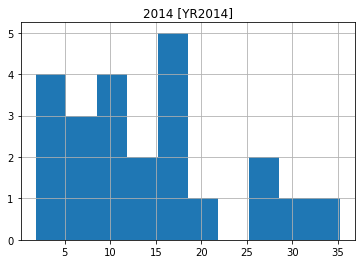

In [1446]:
NA_broadband_without_2014.hist()

In [1447]:
#South America 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

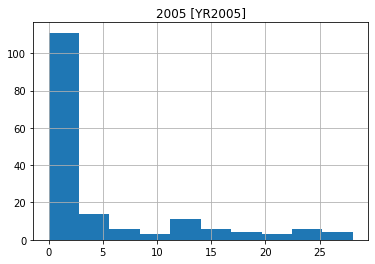

In [1448]:
broadband1.hist(column='2005 [YR2005]')

In [1449]:
#South America 2005 without outliers

In [1450]:
SA_broadband_without_2005 = broadband1[broadband1.Region=="South America"]
SA_broadband_without_2005 = SA_broadband_without_2005[["Country Name","Region","2005 [YR2005]"]]
SA_broadband_without_2005

,Country Name,Region,2005 [YR2005]
7,Argentina,South America,2.382752
23,Bolivia,South America,0.140517
26,Brazil,South America,1.737415
40,Chile,South America,4.378522
42,Colombia,South America,0.747245
57,Ecuador,South America,0.193739
83,Guyana,South America,0.268038
153,Paraguay,South America,0.096152
154,Peru,South America,1.265414
186,Suriname,South America,0.221638


In [1451]:
upper, lower = outliers(SA_broadband_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_broadband_without_2005 = SA_broadband_without_2005[(SA_broadband_without_2005["2005 [YR2005]"] > lower) & (SA_broadband_without_2005["2005 [YR2005]"] < upper)]
SA_broadband_without_2005

Upper whisker:  3.50368602025
Lower Whisker:  -1.7587510637500001


,Country Name,Region,2005 [YR2005]
7,Argentina,South America,2.382752
23,Bolivia,South America,0.140517
26,Brazil,South America,1.737415
42,Colombia,South America,0.747245
57,Ecuador,South America,0.193739
83,Guyana,South America,0.268038
153,Paraguay,South America,0.096152
154,Peru,South America,1.265414
186,Suriname,South America,0.221638
207,Uruguay,South America,1.461225


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

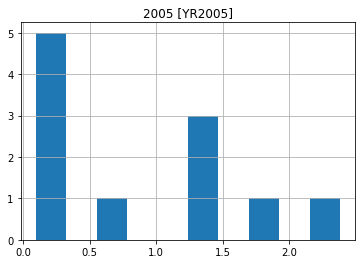

In [1452]:
SA_broadband_without_2005.hist()

In [1453]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

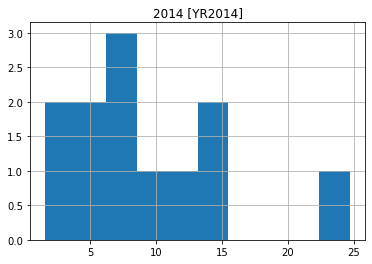

In [1454]:
broadband1[broadband1.Region=="South America"].hist(column='2014 [YR2014]')

In [1455]:
#South America 2014 without outliers

In [1456]:
SA_broadband_without_2014 = broadband1[broadband1.Region=="South America"]
SA_broadband_without_2014 = SA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,15.290428
23,Bolivia,South America,1.613811
26,Brazil,South America,11.820828
40,Chile,South America,14.019499
42,Colombia,South America,10.706497
57,Ecuador,South America,8.272569
83,Guyana,South America,5.924310
153,Paraguay,South America,2.805126
154,Peru,South America,5.872502
186,Suriname,South America,8.386457


In [1457]:
upper, lower = outliers(SA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_broadband_without_2014 = SA_broadband_without_2014[(SA_broadband_without_2014["2014 [YR2014]"] > lower) & (SA_broadband_without_2014["2014 [YR2014]"] < upper)]
SA_broadband_without_2014

Upper whisker:  22.059200900875002
Lower Whisker:  -3.777347288125002


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,15.290428
23,Bolivia,South America,1.613811
26,Brazil,South America,11.820828
40,Chile,South America,14.019499
42,Colombia,South America,10.706497
57,Ecuador,South America,8.272569
83,Guyana,South America,5.924310
153,Paraguay,South America,2.805126
154,Peru,South America,5.872502
186,Suriname,South America,8.386457


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

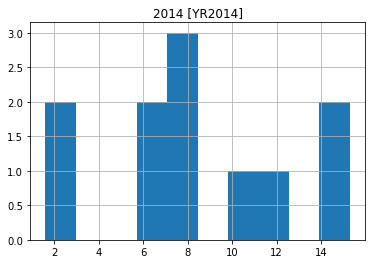

In [1458]:
SA_broadband_without_2014.hist()

In [1459]:
#Western Asia 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

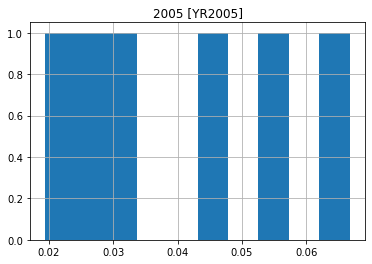

In [1460]:
broadband1[broadband1.Region=="Western Asia"].hist(column='2005 [YR2005]')

In [1461]:
#Western Asia 2005 without outliers

In [1462]:
WA_broadband_without_2005 = broadband1[broadband1.Region=="Western Asia"]
WA_broadband_without_2005 = WA_broadband_without_2005[["Country Name","Region","2005 [YR2005]"]]
WA_broadband_without_2005

,Country Name,Region,2005 [YR2005]
8,Armenia,Western Asia,0.066750
12,Azerbaijan,Western Asia,0.025578
72,Georgia,Western Asia,0.056767
100,Kazakhstan,Western Asia,0.019451
107,Kyrgyz Republic,Western Asia,0.045159
208,Uzbekistan,Western Asia,0.031297


In [1463]:
upper, lower = outliers(WA_broadband_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_broadband_without_2005 = WA_broadband_without_2005[(WA_broadband_without_2005["2005 [YR2005]"] > lower) & (WA_broadband_without_2005["2005 [YR2005]"] < upper)]
WA_broadband_without_2005

Upper whisker:  0.0941519985
Lower Whisker:  -0.013279019499999996


,Country Name,Region,2005 [YR2005]
8,Armenia,Western Asia,0.066750
12,Azerbaijan,Western Asia,0.025578
72,Georgia,Western Asia,0.056767
100,Kazakhstan,Western Asia,0.019451
107,Kyrgyz Republic,Western Asia,0.045159
208,Uzbekistan,Western Asia,0.031297


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

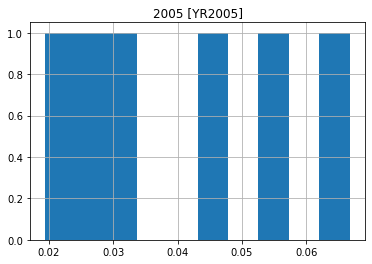

In [1464]:
WA_broadband_without_2005.hist()

In [1465]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

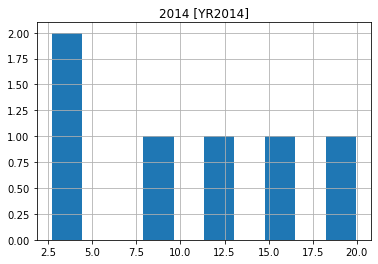

In [1466]:
broadband1[broadband1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [1467]:
#Western Asia 2014 without outliers

In [1468]:
WA_broadband_without_2014 = broadband1[broadband1.Region=="Western Asia"]
WA_broadband_without_2014 = WA_broadband_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_broadband_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,9.369735
12,Azerbaijan,Western Asia,19.967867
72,Georgia,Western Asia,14.889212
100,Kazakhstan,Western Asia,12.414308
107,Kyrgyz Republic,Western Asia,2.920781
208,Uzbekistan,Western Asia,2.696508


In [1469]:
upper, lower = outliers(WA_broadband_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_broadband_without_2014 = WA_broadband_without_2014[(WA_broadband_without_2014["2014 [YR2014]"] > lower) & (WA_broadband_without_2014["2014 [YR2014]"] < upper)]
WA_broadband_without_2014

Upper whisker:  28.876685282125003
Lower Whisker:  -10.073179636875


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,9.369735
12,Azerbaijan,Western Asia,19.967867
72,Georgia,Western Asia,14.889212
100,Kazakhstan,Western Asia,12.414308
107,Kyrgyz Republic,Western Asia,2.920781
208,Uzbekistan,Western Asia,2.696508


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

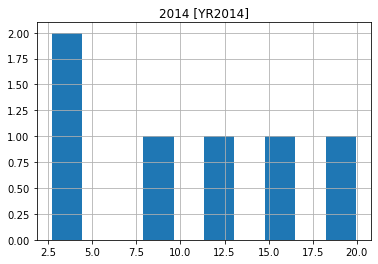

In [1470]:
WA_broadband_without_2014.hist()

# GET DATA Electricity

In [1471]:
electricity1 = pd.read_excel('infrastructure/electricity.xlsx')
electricity1.replace({'..':np.nan},inplace=True)
electricity1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,ALB,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,552.252185,418.453589,453.644074,536.363825,596.407959,663.783995,...,2205.703920,2118.327776,2533.252829,2309.366503,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,DZA,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,531.583836,532.490560,559.783013,547.990472,550.971960,559.917891,...,1123.332915,1237.966109,1278.915242,1362.871884,NaN,NaN,NaN,NaN,NaN,NaN
3,American Samoa,ASM,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Electric power consumption (kWh per capita),EG.USE.ELEC.KH.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1472]:
electricity1 = country.join(electricity1[['2005 [YR2005]', '2014 [YR2014]']])
electricity1

,Country Name,Region,ThirdWorld,2005 [YR2005],2014 [YR2014]
0,Afghanistan,South Asia,1,NaN,NaN
1,Albania,Eastern Europe,0,1722.072850,2309.366503
2,Algeria,Africa,0,890.625924,1362.871884
3,American Samoa,Australia and Oceanea,0,NaN,NaN
4,Andorra,Western Europe,0,NaN,NaN
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,NaN,NaN
213,West Bank and Gaza,Middle East,0,NaN,NaN
214,"Yemen, Rep.",Middle East,1,183.663580,219.799897
215,Zambia,Africa,1,692.715163,717.347305


<AxesSubplot:>

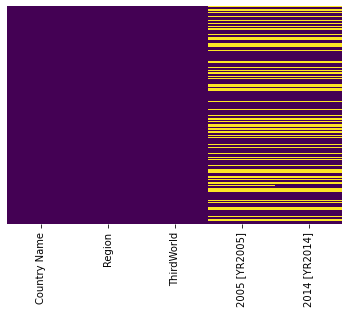

In [1473]:
sns.heatmap(electricity1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

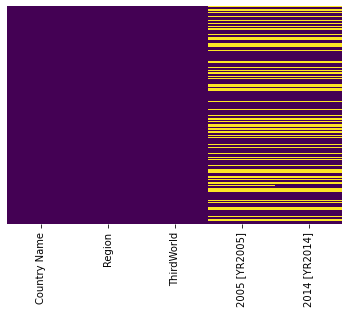

In [1474]:
sns.heatmap(electricity1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1475]:
electricity1 = electricity1.dropna()
electricity1


,Country Name,Region,ThirdWorld,2005 [YR2005],2014 [YR2014]
1,Albania,Eastern Europe,0,1722.072850,2309.366503
2,Algeria,Africa,0,890.625924,1362.871884
5,Angola,Africa,1,109.295219,312.228895
7,Argentina,South America,0,2408.432958,3074.702071
8,Armenia,Western Asia,0,1521.503310,1961.610395
...,...,...,...,...,...
210,"Venezuela, RB",South America,0,2886.490448,2719.138349
211,Vietnam,Southeast Asia,0,569.956850,1423.699910
214,"Yemen, Rep.",Middle East,1,183.663580,219.799897
215,Zambia,Africa,1,692.715163,717.347305


In [1476]:
#North America 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

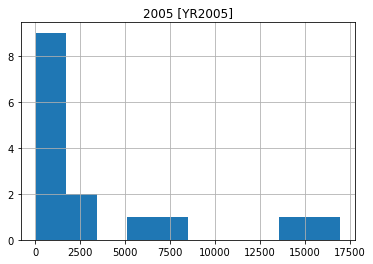

In [1477]:
electricity1[electricity1.Region=="North America"].hist(column='2005 [YR2005]')

In [1478]:
#North America 2005 without outliers

In [1479]:
NA_electricity_without_2005 = electricity1[electricity1.Region=="North America"]
NA_electricity_without_2005 = NA_electricity_without_2005[["Country Name","Region","2005 [YR2005]"]]
NA_electricity_without_2005

,Country Name,Region,2005 [YR2005]
35,Canada,North America,16948.275221
46,Costa Rica,North America,1721.151118
49,Cuba,North America,1155.077091
50,Curacao,North America,7613.070072
56,Dominican Republic,North America,1234.657197
59,El Salvador,North America,755.437265
80,Guatemala,North America,486.164507
84,Haiti,North America,37.301710
85,Honduras,North America,573.402644
97,Jamaica,North America,2397.080292


In [1480]:
upper, lower = outliers(NA_electricity_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_electricity_without_2005 = NA_electricity_without_2005[(NA_electricity_without_2005["2005 [YR2005]"] > lower) & (NA_electricity_without_2005["2005 [YR2005]"] < upper)]
NA_electricity_without_2005

Upper whisker:  8429.546341308078
Lower Whisker:  -3994.6558778866984


,Country Name,Region,2005 [YR2005]
46,Costa Rica,North America,1721.151118
49,Cuba,North America,1155.077091
50,Curacao,North America,7613.070072
56,Dominican Republic,North America,1234.657197
59,El Salvador,North America,755.437265
80,Guatemala,North America,486.164507
84,Haiti,North America,37.301710
85,Honduras,North America,573.402644
97,Jamaica,North America,2397.080292
127,Mexico,North America,1996.392649


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

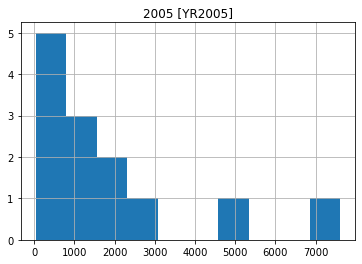

In [1481]:
NA_electricity_without_2005.hist()

In [1482]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

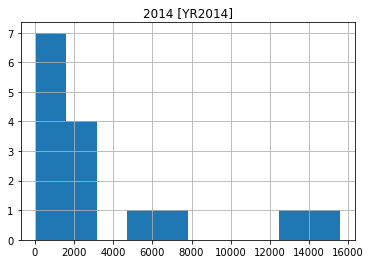

In [1483]:
electricity1[electricity1.Region=="North America"].hist(column='2014 [YR2014]')

In [1484]:
#North America 2014 without outliers

In [1485]:
NA_electricity_without_2014 = electricity1[electricity1.Region=="North America"]
NA_electricity_without_2014 = NA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
35,Canada,North America,15588.487146
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819
50,Curacao,North America,4797.670436
56,Dominican Republic,North America,1615.514607
59,El Salvador,North America,937.074472
80,Guatemala,North America,601.189731
84,Haiti,North America,39.055809
85,Honduras,North America,619.837087
97,Jamaica,North America,1050.732539


In [1486]:
upper, lower = outliers(NA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_electricity_without_2014 = NA_electricity_without_2014[(NA_electricity_without_2014["2014 [YR2014]"] > lower) & (NA_electricity_without_2014["2014 [YR2014]"] < upper)]
NA_electricity_without_2014

Upper whisker:  7526.059109893906
Lower Whisker:  -3270.1062185208984


,Country Name,Region,2014 [YR2014]
46,Costa Rica,North America,1942.490600
49,Cuba,North America,1450.882819
50,Curacao,North America,4797.670436
56,Dominican Republic,North America,1615.514607
59,El Salvador,North America,937.074472
80,Guatemala,North America,601.189731
84,Haiti,North America,39.055809
85,Honduras,North America,619.837087
97,Jamaica,North America,1050.732539
127,Mexico,North America,2157.323788


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

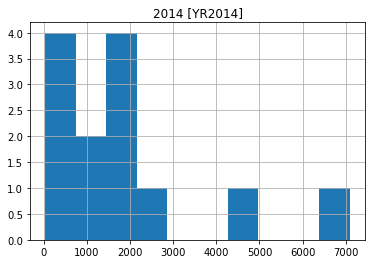

In [1487]:
NA_electricity_without_2014.hist()

In [1488]:
#South America 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

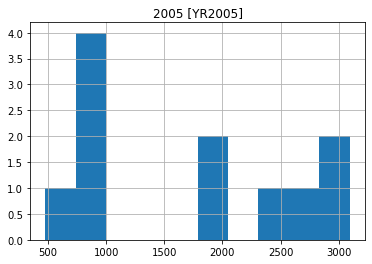

In [1489]:
electricity1[electricity1.Region=="South America"].hist(column='2005 [YR2005]')

In [1490]:
#South America 2005 without outliers

In [1491]:
SA_electricity_without_2005 = electricity1[electricity1.Region=="South America"]
SA_electricity_without_2005 = SA_electricity_without_2005[["Country Name","Region","2005 [YR2005]"]]
SA_electricity_without_2005

,Country Name,Region,2005 [YR2005]
7,Argentina,South America,2408.432958
23,Bolivia,South America,476.587581
26,Brazil,South America,2015.799869
40,Chile,South America,3095.649042
42,Colombia,South America,909.216014
57,Ecuador,South America,794.526828
153,Paraguay,South America,859.532683
154,Peru,South America,829.608981
186,Suriname,South America,2764.980649
207,Uruguay,South America,2001.927269


In [1492]:
upper, lower = outliers(SA_electricity_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_electricity_without_2005 = SA_electricity_without_2005[(SA_electricity_without_2005["2005 [YR2005]"] > lower) & (SA_electricity_without_2005["2005 [YR2005]"] < upper)]
SA_electricity_without_2005

Upper whisker:  5199.910761542352
Lower Whisker:  -1768.6331261987286


,Country Name,Region,2005 [YR2005]
7,Argentina,South America,2408.432958
23,Bolivia,South America,476.587581
26,Brazil,South America,2015.799869
40,Chile,South America,3095.649042
42,Colombia,South America,909.216014
57,Ecuador,South America,794.526828
153,Paraguay,South America,859.532683
154,Peru,South America,829.608981
186,Suriname,South America,2764.980649
207,Uruguay,South America,2001.927269


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

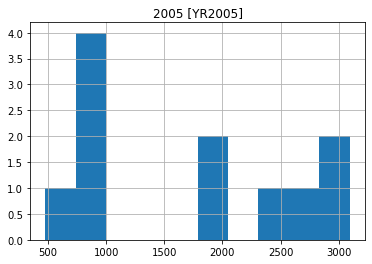

In [1493]:
SA_electricity_without_2005.hist()

In [1494]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

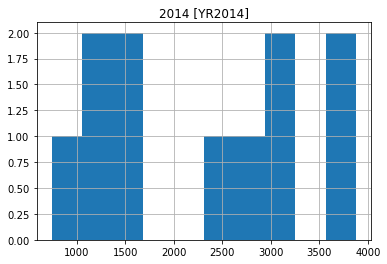

In [1495]:
electricity1[electricity1.Region=="South America"].hist(column='2014 [YR2014]')

In [1496]:
#South America 2014 without outliers

In [1497]:
SA_electricity_without_2014 = electricity1[electricity1.Region=="South America"]
SA_electricity_without_2014 = SA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
57,Ecuador,South America,1376.393633
153,Paraguay,South America,1552.384687
154,Peru,South America,1345.879007
186,Suriname,South America,3596.745217
207,Uruguay,South America,3085.189883


In [1498]:
upper, lower = outliers(SA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_electricity_without_2014 = SA_electricity_without_2014[(SA_electricity_without_2014["2014 [YR2014]"] > lower) & (SA_electricity_without_2014["2014 [YR2014]"] < upper)]
SA_electricity_without_2014

Upper whisker:  5658.16046141894
Lower Whisker:  -1217.0781644964432


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,3074.702071
23,Bolivia,South America,742.538400
26,Brazil,South America,2619.960499
40,Chile,South America,3879.673420
42,Colombia,South America,1312.199493
57,Ecuador,South America,1376.393633
153,Paraguay,South America,1552.384687
154,Peru,South America,1345.879007
186,Suriname,South America,3596.745217
207,Uruguay,South America,3085.189883


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

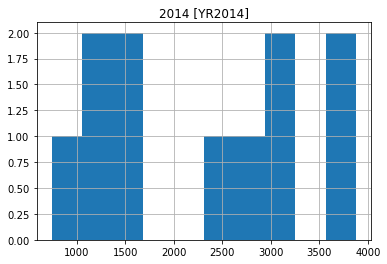

In [1499]:
SA_electricity_without_2014.hist()

In [1500]:
#Western Asia 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

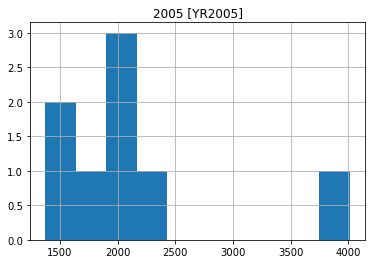

In [1501]:
electricity1[electricity1.Region=="Western Asia"].hist(column='2005 [YR2005]')

In [1502]:
#Western Asia 2005 without outliers

In [1503]:
WA_electricity_without_2005 = electricity1[electricity1.Region=="Western Asia"]
WA_electricity_without_2005 = WA_electricity_without_2005[["Country Name","Region","2005 [YR2005]"]]
WA_electricity_without_2005

,Country Name,Region,2005 [YR2005]
8,Armenia,Western Asia,1521.503310
12,Azerbaijan,Western Asia,2388.388734
72,Georgia,Western Asia,1916.479029
100,Kazakhstan,Western Asia,4012.073919
107,Kyrgyz Republic,Western Asia,1374.307519
190,Tajikistan,Western Asia,2149.553166
199,Turkmenistan,Western Asia,2051.674865
208,Uzbekistan,Western Asia,1717.201055


In [1504]:
upper, lower = outliers(WA_electricity_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_electricity_without_2005 = WA_electricity_without_2005[(WA_electricity_without_2005["2005 [YR2005]"] > lower) & (WA_electricity_without_2005["2005 [YR2005]"] < upper)]
WA_electricity_without_2005

Upper whisker:  3020.740216936724
Lower Whisker:  856.798459423211


,Country Name,Region,2005 [YR2005]
8,Armenia,Western Asia,1521.503310
12,Azerbaijan,Western Asia,2388.388734
72,Georgia,Western Asia,1916.479029
107,Kyrgyz Republic,Western Asia,1374.307519
190,Tajikistan,Western Asia,2149.553166
199,Turkmenistan,Western Asia,2051.674865
208,Uzbekistan,Western Asia,1717.201055


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

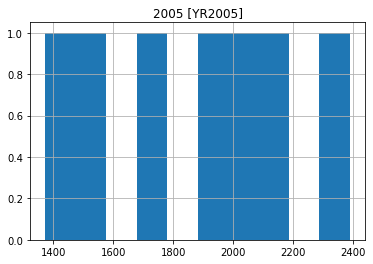

In [1505]:
WA_electricity_without_2005.hist()

In [1506]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

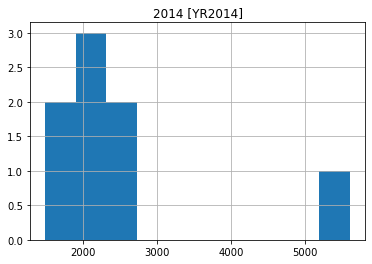

In [1507]:
electricity1[electricity1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [1508]:
#Western Asia 2014 without outliers

In [1509]:
WA_electricity_without_2014 = electricity1[electricity1.Region=="Western Asia"]
WA_electricity_without_2014 = WA_electricity_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_electricity_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
72,Georgia,Western Asia,2693.972760
100,Kazakhstan,Western Asia,5600.208465
107,Kyrgyz Republic,Western Asia,1941.221832
190,Tajikistan,Western Asia,1499.485994
199,Turkmenistan,Western Asia,2678.765474
208,Uzbekistan,Western Asia,1645.441629


In [1510]:
upper, lower = outliers(WA_electricity_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_electricity_without_2014 = WA_electricity_without_2014[(WA_electricity_without_2014["2014 [YR2014]"] > lower) & (WA_electricity_without_2014["2014 [YR2014]"] < upper)]
WA_electricity_without_2014

Upper whisker:  3905.5030667364827
Lower Whisker:  644.3410099275495


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,1961.610395
12,Azerbaijan,Western Asia,2202.393918
72,Georgia,Western Asia,2693.972760
107,Kyrgyz Republic,Western Asia,1941.221832
190,Tajikistan,Western Asia,1499.485994
199,Turkmenistan,Western Asia,2678.765474
208,Uzbekistan,Western Asia,1645.441629


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

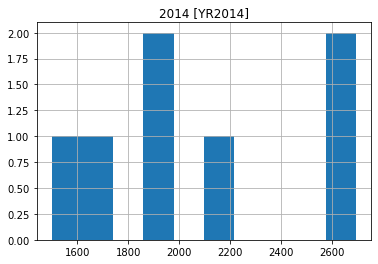

In [1511]:
WA_electricity_without_2014.hist()

# GET DATA Mobile

In [1512]:
mobile1 = pd.read_excel('infrastructure/mobile.xlsx')
mobile1.replace({'..':np.nan},inplace=True)
mobile1

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],...,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,45.813626,49.227977,52.083576,55.159515,57.271068,61.054638,65.929134,59.120848,59.356020,58.255812
1,Albania,ALB,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,105.852915,120.105858,126.936969,115.997935,117.659218,116.744444,125.710352,94.176998,91.293015,91.002944
2,Algeria,DZA,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.001825,0.01811,0.017689,0.017300,0.004778,0.016312,...,97.148178,100.384679,103.610140,111.238610,108.808940,116.004208,110.767246,111.664792,105.510594,103.887317
3,American Samoa,ASM,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.402918,1.764014,2.303484,2.351348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Mobile cellular subscriptions (per 100 people),IT.CEL.SETS.P2,0.000000,0.00000,1.307567,1.279297,1.250858,4.424432,...,77.667260,77.480680,79.147993,83.623900,91.443514,98.492826,104.332411,107.282549,113.957377,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1513]:
mobile1 = country.join(mobile1[['2005 [YR2005]', '2014 [YR2014]']])
mobile1

,Country Name,Region,ThirdWorld,2005 [YR2005],2014 [YR2014]
0,Afghanistan,South Asia,1,4.677583,55.159515
1,Albania,Eastern Europe,0,49.573638,115.997935
2,Algeria,Africa,0,41.211067,111.238610
3,American Samoa,Australia and Oceanea,0,NaN,NaN
4,Andorra,Western Europe,0,81.859333,83.623900
...,...,...,...,...,...
212,Virgin Islands (U.S.),North America,0,74.493942,NaN
213,West Bank and Gaza,Middle East,0,15.863337,72.201640
214,"Yemen, Rep.",Middle East,1,11.326964,66.218793
215,Zambia,Africa,1,8.008934,65.681859


<AxesSubplot:>

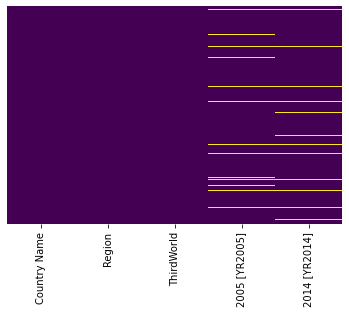

In [1514]:
sns.heatmap(mobile1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1515]:
mobile1 = mobile1.dropna()
mobile1

,Country Name,Region,ThirdWorld,2005 [YR2005],2014 [YR2014]
0,Afghanistan,South Asia,1,4.677583,55.159515
1,Albania,Eastern Europe,0,49.573638,115.997935
2,Algeria,Africa,0,41.211067,111.238610
4,Andorra,Western Europe,0,81.859333,83.623900
5,Angola,Africa,1,8.290373,52.158983
...,...,...,...,...,...
211,Vietnam,Southeast Asia,0,11.443273,148.448819
213,West Bank and Gaza,Middle East,0,15.863337,72.201640
214,"Yemen, Rep.",Middle East,1,11.326964,66.218793
215,Zambia,Africa,1,8.008934,65.681859


<AxesSubplot:>

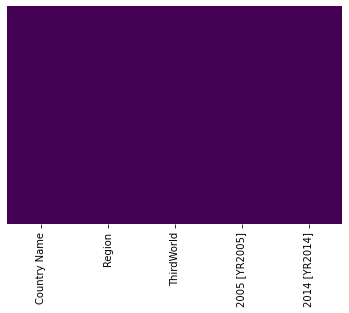

In [1516]:
sns.heatmap(mobile1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1517]:
#North America 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

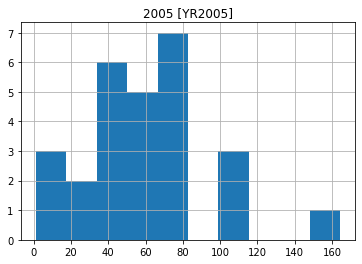

In [1518]:
mobile1[mobile1.Region=="North America"].hist(column='2005 [YR2005]')

In [1519]:
#North America 2005 without outliers

In [1520]:
NA_mobile_without_2005 = mobile1[mobile1.Region=="North America"]
NA_mobile_without_2005 = NA_mobile_without_2005[["Country Name","Region","2005 [YR2005]"]]
NA_mobile_without_2005

,Country Name,Region,2005 [YR2005]
6,Antigua and Barbuda,North America,105.566808
9,Aruba,North America,103.384951
13,"Bahamas, The",North America,70.113803
16,Barbados,North America,74.619196
19,Belize,North America,33.826638
21,Bermuda,North America,79.568951
35,Canada,North America,52.905225
36,Cayman Islands,North America,164.318629
46,Costa Rica,North America,25.698390
49,Cuba,North America,1.203508


In [1521]:
upper, lower = outliers(NA_mobile_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_mobile_without_2005 = NA_mobile_without_2005[(NA_mobile_without_2005["2005 [YR2005]"] > lower) & (NA_mobile_without_2005["2005 [YR2005]"] < upper)]
NA_mobile_without_2005

Upper whisker:  126.77739050500001
Lower Whisker:  -16.652992415000007


,Country Name,Region,2005 [YR2005]
6,Antigua and Barbuda,North America,105.566808
9,Aruba,North America,103.384951
13,"Bahamas, The",North America,70.113803
16,Barbados,North America,74.619196
19,Belize,North America,33.826638
21,Bermuda,North America,79.568951
35,Canada,North America,52.905225
46,Costa Rica,North America,25.698390
49,Cuba,North America,1.203508
55,Dominica,North America,73.665869


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

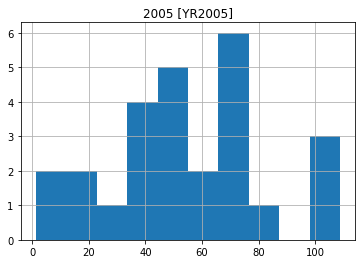

In [1522]:
NA_mobile_without_2005.hist()

In [1523]:
#North America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

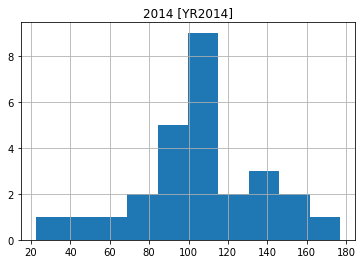

In [1524]:
mobile1[mobile1.Region=="North America"].hist(column='2014 [YR2014]')

In [1525]:
#North America 2014 without outliers

In [1526]:
NA_mobile_without_2014 = mobile1[mobile1.Region=="North America"]
NA_mobile_without_2014 = NA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
NA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,129.687129
9,Aruba,North America,134.619461
13,"Bahamas, The",North America,84.947104
16,Barbados,North America,107.243019
19,Belize,North America,48.759643
21,Bermuda,North America,92.906782
35,Canada,North America,80.722095
36,Cayman Islands,North America,149.649947
46,Costa Rica,North America,146.399004
49,Cuba,North America,22.382360


In [1527]:
upper, lower = outliers(NA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
NA_mobile_without_2014 = NA_mobile_without_2014[(NA_mobile_without_2014["2014 [YR2014]"] > lower) & (NA_mobile_without_2014["2014 [YR2014]"] < upper)]
NA_mobile_without_2014

Upper whisker:  192.0375797775
Lower Whisker:  23.54457463749999


,Country Name,Region,2014 [YR2014]
6,Antigua and Barbuda,North America,129.687129
9,Aruba,North America,134.619461
13,"Bahamas, The",North America,84.947104
16,Barbados,North America,107.243019
19,Belize,North America,48.759643
21,Bermuda,North America,92.906782
35,Canada,North America,80.722095
36,Cayman Islands,North America,149.649947
46,Costa Rica,North America,146.399004
55,Dominica,North America,103.940353


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

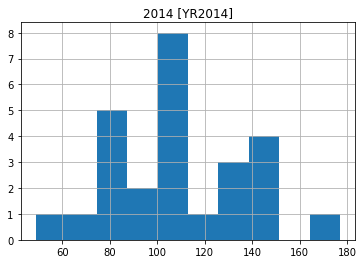

In [1528]:
NA_mobile_without_2014.hist()

In [1529]:
#South America 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

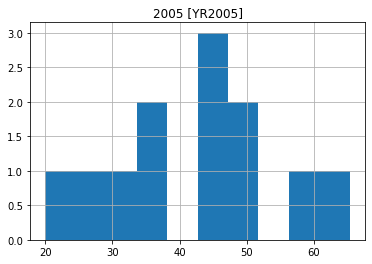

In [1530]:
mobile1[mobile1.Region=="South America"].hist(column='2005 [YR2005]')

In [1531]:
#South America 2005 without outliers

In [1532]:
SA_mobile_without_2005 = mobile1[mobile1.Region=="South America"]
SA_mobile_without_2005 = SA_mobile_without_2005[["Country Name","Region","2005 [YR2005]"]]
SA_mobile_without_2005

,Country Name,Region,2005 [YR2005]
7,Argentina,South America,56.967746
23,Bolivia,South America,26.227489
26,Brazil,South America,46.317992
40,Chile,South America,65.313936
42,Colombia,South America,51.233668
57,Ecuador,South America,45.178657
83,Guyana,South America,37.708651
153,Paraguay,South America,32.399878
154,Peru,South America,20.036342
186,Suriname,South America,46.606963


In [1533]:
upper, lower = outliers(SA_mobile_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_mobile_without_2005 = SA_mobile_without_2005[(SA_mobile_without_2005["2005 [YR2005]"] > lower) & (SA_mobile_without_2005["2005 [YR2005]"] < upper)]
SA_mobile_without_2005

Upper whisker:  69.39621454125
Lower Whisker:  13.04376949125


,Country Name,Region,2005 [YR2005]
7,Argentina,South America,56.967746
23,Bolivia,South America,26.227489
26,Brazil,South America,46.317992
40,Chile,South America,65.313936
42,Colombia,South America,51.233668
57,Ecuador,South America,45.178657
83,Guyana,South America,37.708651
153,Paraguay,South America,32.399878
154,Peru,South America,20.036342
186,Suriname,South America,46.606963


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

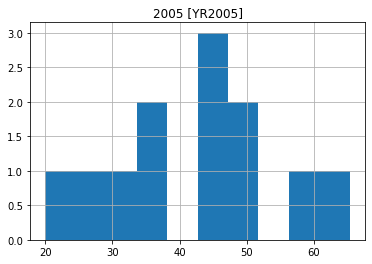

In [1534]:
SA_mobile_without_2005.hist()

In [1535]:
#South America 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

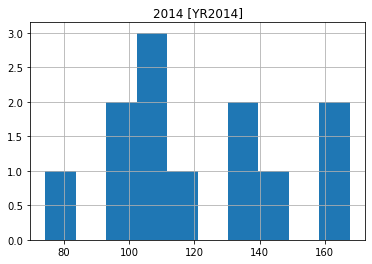

In [1536]:
mobile1[mobile1.Region=="South America"].hist(column='2014 [YR2014]')

In [1537]:
#South America 2014 without outliers

In [1538]:
SA_mobile_without_2014 = mobile1[mobile1.Region=="South America"]
SA_mobile_without_2014 = SA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
SA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
57,Ecuador,South America,104.099195
83,Guyana,South America,74.262490
153,Paraguay,South America,110.693965
154,Peru,South America,105.947699
186,Suriname,South America,167.692983


In [1539]:
upper, lower = outliers(SA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
SA_mobile_without_2014 = SA_mobile_without_2014[(SA_mobile_without_2014["2014 [YR2014]"] > lower) & (SA_mobile_without_2014["2014 [YR2014]"] < upper)]
SA_mobile_without_2014

Upper whisker:  194.13881896250004
Lower Whisker:  49.08155606249997


,Country Name,Region,2014 [YR2014]
7,Argentina,South America,143.615832
23,Bolivia,South America,97.607289
26,Brazil,South America,138.451183
40,Chile,South America,133.345192
42,Colombia,South America,117.804953
57,Ecuador,South America,104.099195
83,Guyana,South America,74.262490
153,Paraguay,South America,110.693965
154,Peru,South America,105.947699
186,Suriname,South America,167.692983


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

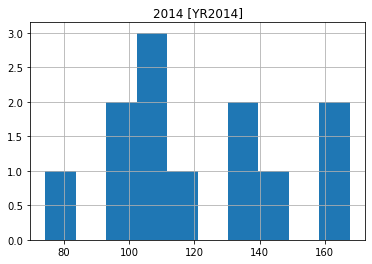

In [1540]:
SA_mobile_without_2014.hist()

In [1541]:
#Western Asia 2005 with outliers

array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

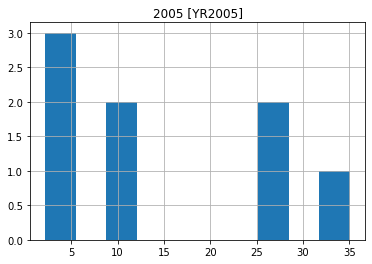

In [1542]:
mobile1[mobile1.Region=="Western Asia"].hist(column='2005 [YR2005]')

In [1543]:
#Western Asia 2005 without outliers

In [1544]:
WA_mobile_without_2005 = mobile1[mobile1.Region=="Western Asia"]
WA_mobile_without_2005 = WA_mobile_without_2005[["Country Name","Region","2005 [YR2005]"]]
WA_mobile_without_2005

,Country Name,Region,2005 [YR2005]
8,Armenia,Western Asia,10.668075
12,Azerbaijan,Western Asia,26.257216
72,Georgia,Western Asia,27.892189
100,Kazakhstan,Western Asia,35.045560
107,Kyrgyz Republic,Western Asia,10.672216
190,Tajikistan,Western Asia,3.903189
199,Turkmenistan,Western Asia,2.208366
208,Uzbekistan,Western Asia,2.724405


In [1545]:
upper, lower = outliers(WA_mobile_without_2005, "2005 [YR2005]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_mobile_without_2005 = WA_mobile_without_2005[(WA_mobile_without_2005["2005 [YR2005]"] > lower) & (WA_mobile_without_2005["2005 [YR2005]"] < upper)]
WA_mobile_without_2005

Upper whisker:  61.25215982362501
Lower Whisker:  -30.977707639375


,Country Name,Region,2005 [YR2005]
8,Armenia,Western Asia,10.668075
12,Azerbaijan,Western Asia,26.257216
72,Georgia,Western Asia,27.892189
100,Kazakhstan,Western Asia,35.045560
107,Kyrgyz Republic,Western Asia,10.672216
190,Tajikistan,Western Asia,3.903189
199,Turkmenistan,Western Asia,2.208366
208,Uzbekistan,Western Asia,2.724405


array([[<AxesSubplot:title={'center':'2005 [YR2005]'}>]], dtype=object)

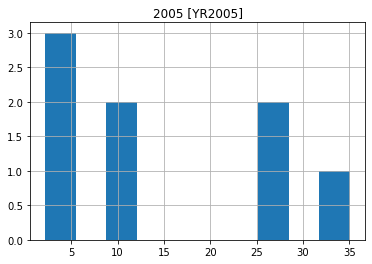

In [1546]:
WA_mobile_without_2005.hist()

In [1547]:
#Western Asia 2014 with outliers

array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

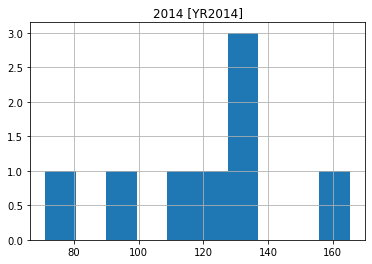

In [1548]:
mobile1[mobile1.Region=="Western Asia"].hist(column='2014 [YR2014]')

In [1549]:
#Western Asia 2014 without outliers

In [1550]:
WA_mobile_without_2014 = mobile1[mobile1.Region=="Western Asia"]
WA_mobile_without_2014 = WA_mobile_without_2014[["Country Name","Region","2014 [YR2014]"]]
WA_mobile_without_2014

,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
72,Georgia,Western Asia,133.837665
100,Kazakhstan,Western Asia,165.267504
107,Kyrgyz Republic,Western Asia,129.410601
190,Tajikistan,Western Asia,96.925504
199,Turkmenistan,Western Asia,131.827069
208,Uzbekistan,Western Asia,71.119845


In [1551]:
upper, lower = outliers(WA_mobile_without_2014, "2014 [YR2014]")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)
WA_mobile_without_2014 = WA_mobile_without_2014[(WA_mobile_without_2014["2014 [YR2014]"] > lower) & (WA_mobile_without_2014["2014 [YR2014]"] < upper)]
WA_mobile_without_2014

Upper whisker:  169.58708725625
Lower Whisker:  70.23410290625


,Country Name,Region,2014 [YR2014]
8,Armenia,Western Asia,118.772363
12,Azerbaijan,Western Asia,111.013461
72,Georgia,Western Asia,133.837665
100,Kazakhstan,Western Asia,165.267504
107,Kyrgyz Republic,Western Asia,129.410601
190,Tajikistan,Western Asia,96.925504
199,Turkmenistan,Western Asia,131.827069
208,Uzbekistan,Western Asia,71.119845


array([[<AxesSubplot:title={'center':'2014 [YR2014]'}>]], dtype=object)

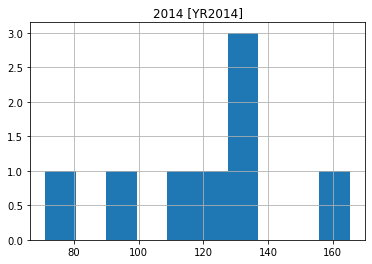

In [1552]:
WA_mobile_without_2014.hist()